In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 8)

## 1. Creación del Grafo
A partir del archivo de datos, genere el grafo de colaboraciones entre autores. Cuente el número de
nodos y aristas. Haga una representacion grafica del grafo.

In [62]:
all_authors = set()

def create_graph():
    G = nx.Graph(name="Authors")
    csv = pd.read_csv("data.csv", names=["year", "code", "pub", "authors", "name"])
    for index, author_string in enumerate(csv["authors"]):
        authors = [a.strip() for a in author_string.split("&")]
        all_authors.update(authors)
        if len(authors) == 1:
            G.add_nodes_from(authors)
        else:
            comb = combinations(authors, 2)
            G.add_edges_from(comb)
            
    return G

In [65]:
G = create_graph()
print(nx.info(G))

Name: Authors
Type: Graph
Number of nodes: 3998
Number of edges: 7880
Average degree:   3.9420


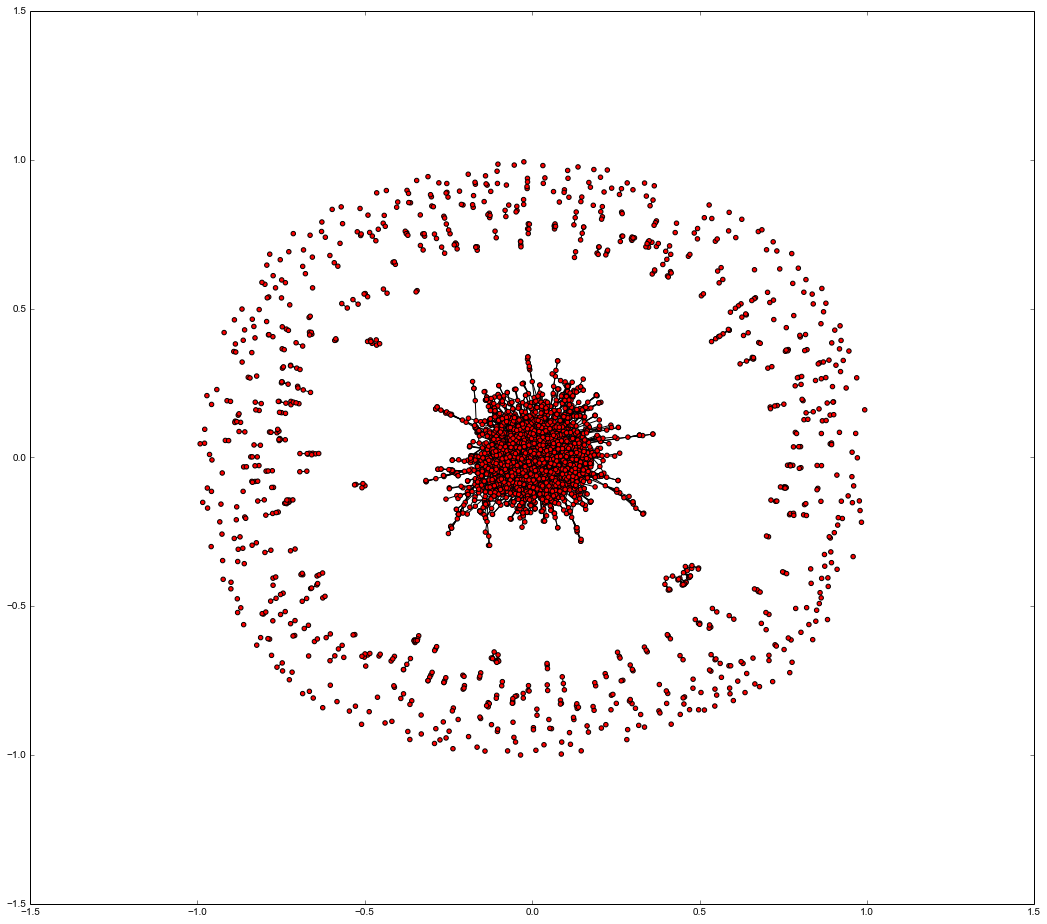

In [55]:
def draw_graph(G):
    plt.figure(figsize=(18, 16))
    nx.draw_networkx(G, node_size=20, with_labels=False)

draw_graph(G)

## 2. Distribución de Grado
Grafique la distribución del grado de los autores, en escalas lineales, semilogarıtmica, y log-log. Argumente, a partir de los graficos, de que tipo de distribucion se trata.

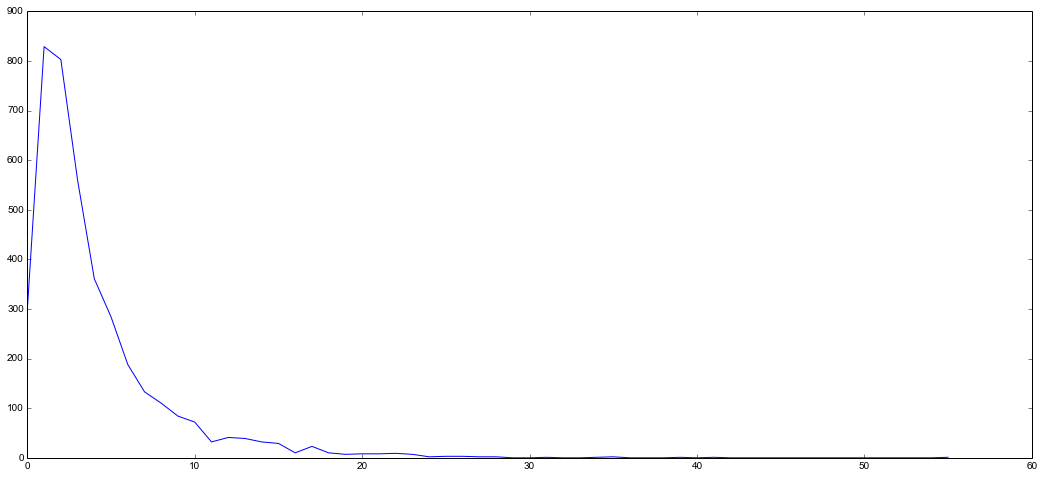

In [68]:
deg_histogram = nx.degree_histogram(G)
plt.plot(deg_histogram)

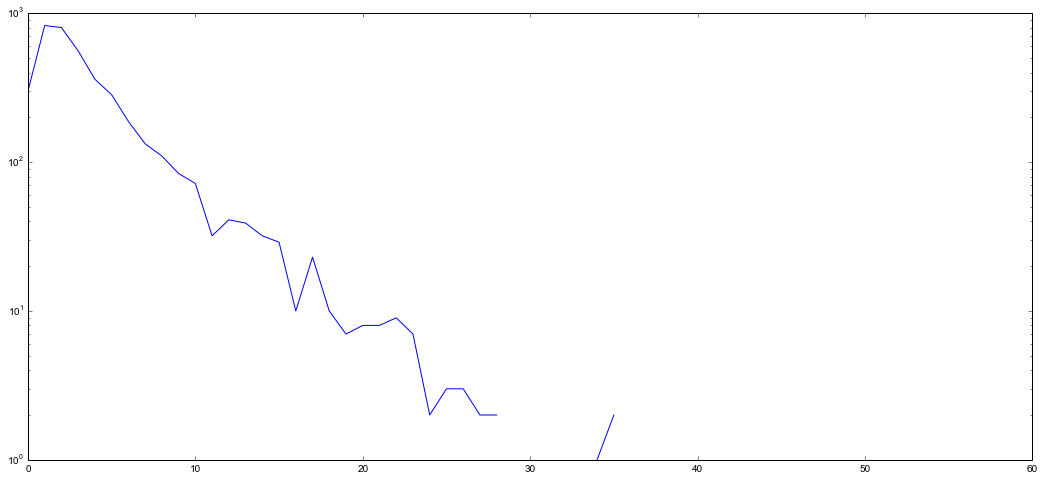

In [72]:
plt.semilogy(deg_histogram)

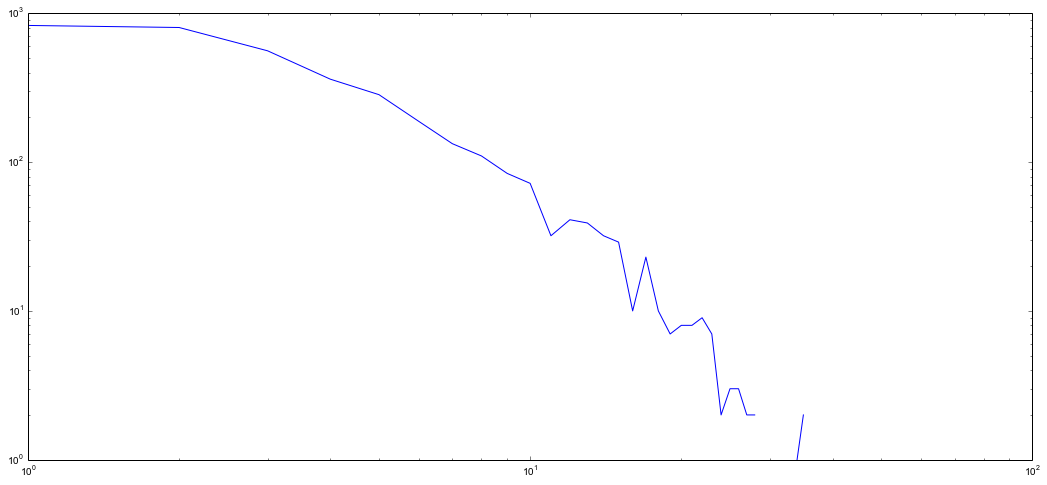

In [71]:
plt.loglog(deg_histogram)

Vista con el eje Y en escala logarítmica parece ser una línea recta, por lo que la distribución parecería ser una exponencial

## 3. Componentes Conexas
Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o componente gigante.